In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the file
ahp_df = pd.read_csv('airline_pair_wise_comparison.csv')
ahp_df.set_index('Categories', inplace=True)
ahp_df

,Cost,Delay,Duration,Amenities
Categories,,,,
Cost,1.00,3,2.00,2.00
Delay,0.33,1,0.25,0.25
Duration,0.50,4,1.00,0.50
Amenities,0.50,4,2.00,1.00


In [3]:
# We will introduce a function to find the priority index. 
# Then we provide the attributes data to this function.
def ahp_attributes(ahp_df):
    # Creating an array of sum of values in each column
    sum_array = np.array(ahp_df.sum(numeric_only=True))
    # Creating a normalized pairwise comparison matrix.
    # By dividing each column cell value with the sum of the respective column.
    cell_by_sum = ahp_df.div(sum_array,axis=1)
    # Creating Priority index by taking avg of each row
    priority_df = pd.DataFrame(cell_by_sum.mean(axis=1),
                               index=ahp_df.index,columns=['Priority Index'])
    priority_df = priority_df.transpose()
    return priority_df

In [4]:
# Calling the ahp_attributes function, 
# To return a table with the priority index for each attribute.
priority_index_attr = ahp_attributes(ahp_df)
priority_index_attr

Categories,Cost,Delay,Duration,Amenities
Priority Index,0.398368,0.084812,0.217934,0.298886


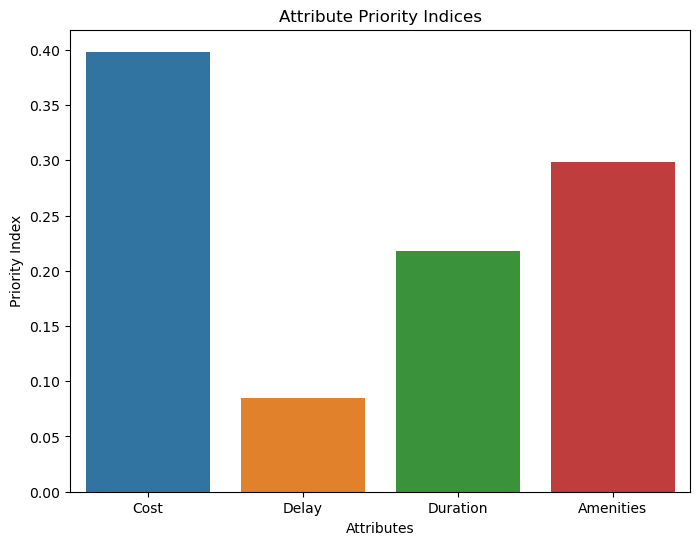

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x=priority_index_attr.columns, y=priority_index_attr.values[0])
plt.title("Attribute Priority Indices")
plt.xlabel("Attributes")
plt.ylabel("Priority Index")
plt.show()

In [6]:
def consistency_ratio(priority_index,ahp_df):
    random_consistency_matrix = {1:0,2:0,3:0.58,4:0.9,5:1.12,6:1.24,7:1.32,
                     8:1.14,9:1.45,10:1.49,11:1.51,12:1.48,13:1.56,
                     14:1.57,15:1.59,16:1.605,17:1.61,18:1.615,19:1.62,20:1.625}
    # Check for consistency
    consistency_df = ahp_df.multiply(np.array(priority_index.loc['Priority Index']),axis=1)
    consistency_df['sum_of_col'] = consistency_df.sum(axis=1)
    # To find lambda max
    lambda_max_df = consistency_df['sum_of_col'].div(np.array(priority_index.transpose()
                                                              ['Priority Index']),axis=0)
    lambda_max = lambda_max_df.mean()
    # To find the consistency index
    consistency_index = round((lambda_max-len(ahp_df.index))/(len(ahp_df.index)-1),3)
    print(f'The Consistency Index is: {consistency_index}')
    # To find the consistency ratio
    consistency_ratio = round(consistency_index/random_consistency_matrix[len(ahp_df.index)],3)
    print(f'The Consistency Ratio is: {consistency_ratio}')
    if consistency_ratio<0.1:
        print('The model is consistent')
    else:
        print('The model is not consistent')

In [7]:
consistency_ratio(priority_index_attr,ahp_df)

The Consistency Index is: 0.06
The Consistency Ratio is: 0.067
The model is consistent


In [8]:
ahp_df_1 = pd.read_csv('airline_attribute.csv',header=[0], index_col=[0,1]) 
ahp_df_1

Air India  Air Canada  Lufthansa  Emirates  \
Criteria  Airline                                                       
Price     Air India         1.000000    5.000000   0.166667  0.250000   
          Air Canada        0.200000    1.000000   0.166667  0.250000   
          Lufthansa         6.000000    6.000000   1.000000  5.000000   
          Emirates          4.000000    4.000000   0.200000  1.000000   
          British Airways   5.000000    5.000000   0.250000  4.000000   
          Qatar Airways     7.000000    7.000000   6.000000  6.000000   
Delay     Air India         1.000000    0.250000   0.333333  0.200000   
          Air Canada        4.000000    1.000000   4.000000  0.200000   
          Lufthansa         3.000000    0.250000   1.000000  0.200000   
          Emirates          5.000000    5.000000   5.000000  1.000000   
          British Airways   7.000000    6.000000   6.000000  4.000000   
          Qatar Airways     4.000000    2.000000   3.000000  0.200000   
Duration  Air India         1.000000    0.333333   5.000000  7.000000   
          Air Canada        3.000000    1.000000   5.000000  7.000000   
          Lufthansa         0.200000    0.200000   1.000000  5.000000   
          Emirates          0.142857    0.142857   0.200000  1.000000   
          British Airways   0.250000    0.250000   4.000000  5.000000   
          Qatar Airways     0.166667    0.166667   0.333333  4.000000   
Amenities Air India         1.000000    0.200000   1.000000  0.142857   
          Air Canada        5.000000    1.000000   5.000000  0.200000   
          Lufthansa         1.000000    0.200000   1.000000  0.142857   
          Emirates          7.000000    5.000000   7.000000  1.000000   
          British Airways   5.000000    1.000000   5.000000  0.142857   
          Qatar Airways     5.000000    1.000000   5.000000  0.142857   

                           British Airways  Qatar Airways  
Criteria  Airline                                          
Price     Air India               0.200000       0.142857  
          Air Canada              0.200000       0.142857  
          Lufthansa               4.000000       0.166667  
          Emirates                0.250000       0.166667  
          British Airways         1.000000       0.200000  
          Qatar Airways           5.000000       1.000000  
Delay     Air India               0.142857       0.250000  
          Air Canada              0.166667       0.500000  
          Lufthansa               0.166667       0.333333  
          Emirates                0.250000       5.000000  
          British Airways         1.000000       5.000000  
          Qatar Airways           0.166667       1.000000  
Duration  Air India               4.000000       6.000000  
          Air Canada              4.000000       6.000000  
          Lufthansa               0.250000       3.000000  
          Emirates                0.200000       0.250000  
          British Airways         1.000000       4.000000  
          Qatar Airways           0.250000       1.000000  
Amenities Air India               0.200000       0.200000  
          Air Canada              1.000000       1.000000  
          Lufthansa               0.200000       0.200000  
          Emirates                7.000000       7.000000  
          British Airways         1.000000       1.000000  
          Qatar Airways           1.000000       1.000000

In [9]:
def airline_priority_index(airline_attr_df,num_attr,attr_name):
    data_dict = {}
    # To find airline priority indices
    # Airline priority for attr 1
    data_dict[f"ahp_df_airline_{attr_name}"] = airline_attr_df.loc[attr_name]
    # Creating an array of sum of values in each column
    data_dict[f"sum_array_airline_{attr_name}"] = np.array(data_dict[
        f"ahp_df_airline_{attr_name}"].sum(numeric_only=True))
    # Normalised pairwise comparison matrix
    # Dividing each column cell value with the sum of the respective column.
    data_dict[f"norm_mat_airline_{attr_name}"] = data_dict[
        f"ahp_df_airline_{attr_name}"].div(data_dict[f"sum_array_airline_{attr_name}"],axis=1)
    priority_df = pd.DataFrame(data_dict[
        f"norm_mat_airline_{attr_name}"].mean(axis=1),
                               index=airline_attr_df.loc[attr_name].index,columns=[attr_name])
    return priority_df

In [10]:
airline_price_df = airline_priority_index(ahp_df_1,4,'Price')
airline_delay_df = airline_priority_index(ahp_df_1,4,'Delay')
airline_duration_df = airline_priority_index(ahp_df_1,4,'Duration')
airline_amenities_df = airline_priority_index(ahp_df_1,4,'Amenities')

airline_df = pd.concat([airline_price_df,airline_delay_df,airline_duration_df,airline_amenities_df],axis=1)
airline_norm_df = airline_df.multiply(np.array(priority_index_attr.loc['Priority Index']),axis=1)
airline_norm_df['Eigen Vector'] = airline_norm_df.sum(axis=1)
airline_norm_df

,Price,Delay,Duration,Amenities,Eigen Vector
Airline,,,,,
Air India,0.023607,0.002923,0.059616,0.011270,0.097417
Air Canada,0.011832,0.008572,0.086449,0.041890,0.148744
Lufthansa,0.091069,0.004864,0.019915,0.011270,0.127118
Emirates,0.034304,0.021628,0.006487,0.153889,0.216308
British Airways,0.057928,0.037424,0.032782,0.040283,0.168417
Qatar Airways,0.179628,0.009401,0.012684,0.040283,0.241996


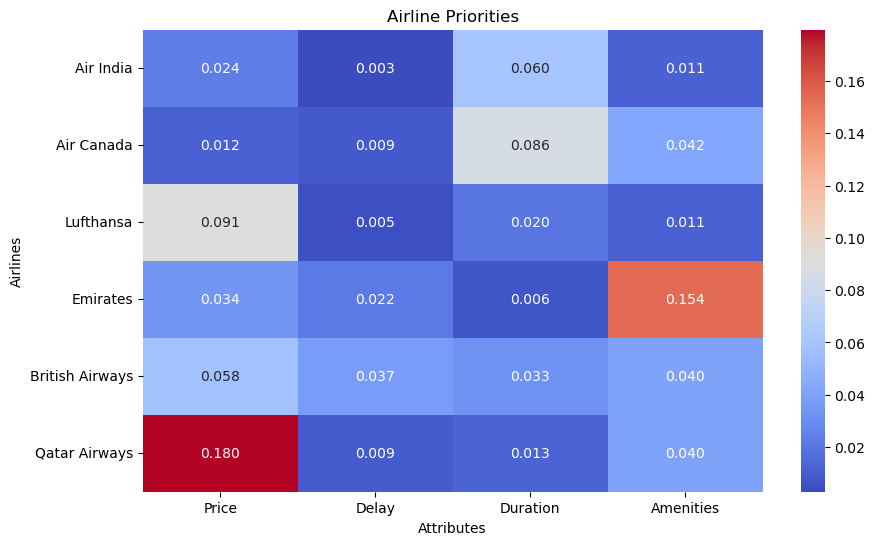

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(airline_norm_df.drop('Eigen Vector', axis=1), annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Airline Priorities")
plt.xlabel("Attributes")
plt.ylabel("Airlines")
plt.show()

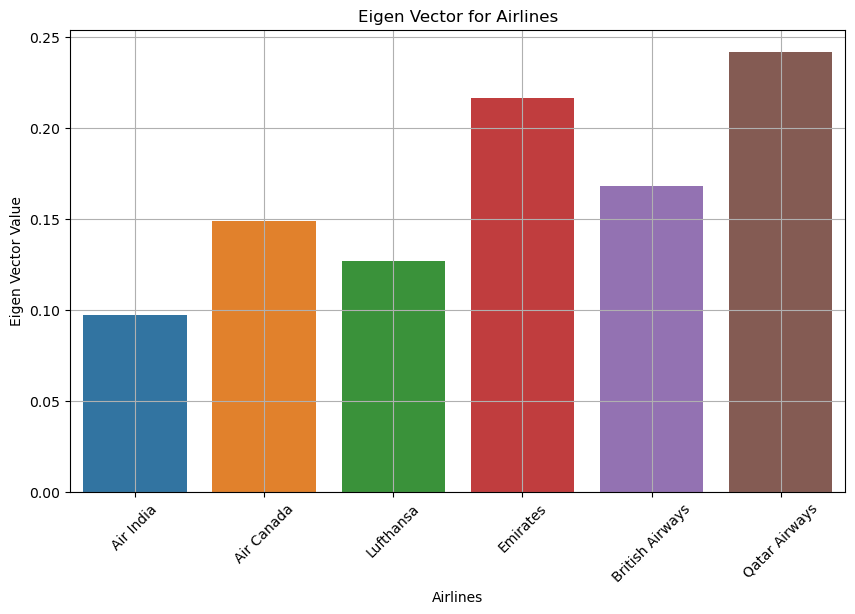

Ranked Airlines:
           Airline  Eigen Vector  Rank
5    Qatar Airways      0.241996     1
3         Emirates      0.216308     2
4  British Airways      0.168417     3
1       Air Canada      0.148744     4
2        Lufthansa      0.127118     5
0        Air India      0.097417     6


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Given Data
eigen_vector_data = {
    'Airline': ['Air India', 'Air Canada', 'Lufthansa', 'Emirates', 'British Airways', 'Qatar Airways'],
    'Eigen Vector': [0.097417, 0.148744, 0.127118, 0.216308, 0.168417, 0.241996],
}

# Create a DataFrame from the given data
eigen_vector_df = pd.DataFrame(eigen_vector_data)

# Step 1: Plotting the Eigen Vector values for each airline
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Eigen Vector', data=eigen_vector_df)
plt.title("Eigen Vector for Airlines")
plt.xlabel("Airlines")
plt.ylabel("Eigen Vector Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 2: Creating a new table with the airlines ranked according to their Eigen Vector values
ranked_airlines = eigen_vector_df.sort_values(by='Eigen Vector', ascending=False)
ranked_airlines['Rank'] = range(1, len(ranked_airlines) + 1)

print("Ranked Airlines:")
print(ranked_airlines)
